## Predicting the Beats-per-Minute of Songs

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/playground-series-s5e9/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pagidipallyajaykumar
Your Kaggle Key: ··········


100%|██████████| 33.3M/33.3M [00:00<00:00, 1.03GB/s]


Extracting archive ./playground-series-s5e9/playground-series-s5e9.zip to ./playground-series-s5e9


In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/playground-series-s5e9/train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [ ]:
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [ ]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [ ]:
df.corr()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
id,1.000000,0.000196,0.001037,-0.000863,0.001172,-0.000371,-0.000300,0.001597,-0.001508,0.000177,-0.000355
RhythmScore,0.000196,1.000000,-0.017385,0.008737,0.028203,0.010992,0.031535,-0.008946,-0.017640,-0.147350,0.005440
AudioLoudness,0.001037,-0.017385,1.000000,-0.009357,-0.013019,0.003772,-0.021620,-0.027305,0.004510,0.192411,-0.003327
VocalContent,-0.000863,0.008737,-0.009357,1.000000,0.009370,-0.017739,-0.120294,0.058675,0.018179,0.016124,0.004876
AcousticQuality,0.001172,0.028203,-0.013019,0.009370,1.000000,0.003247,0.009678,0.037047,-0.022524,-0.418184,-0.000820
InstrumentalScore,-0.000371,0.010992,0.003772,-0.017739,0.003247,1.000000,-0.002403,0.004738,0.009340,-0.019834,0.001900
LivePerformanceLikelihood,-0.000300,0.031535,-0.021620,-0.120294,0.009678,-0.002403,1.000000,0.015461,0.005179,-0.266256,0.003471
MoodScore,0.001597,-0.008946,-0.027305,0.058675,0.037047,0.004738,0.015461,1.000000,-0.014803,-0.241713,0.007059
TrackDurationMs,-0.001508,-0.017640,0.004510,0.018179,-0.022524,0.009340,0.005179,-0.014803,1.000000,0.048597,0.006637
Energy,0.000177,-0.147350,0.192411,0.016124,-0.418184,-0.019834,-0.266256,-0.241713,0.048597,1.000000,-0.004375


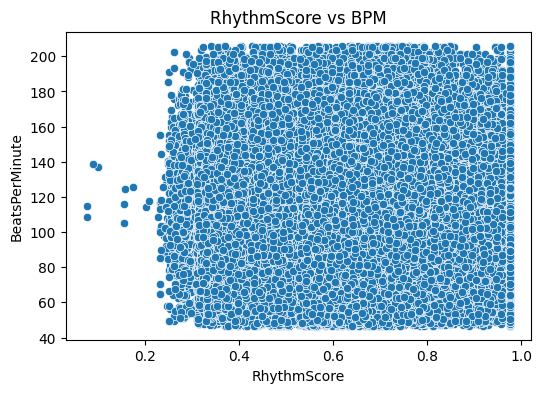

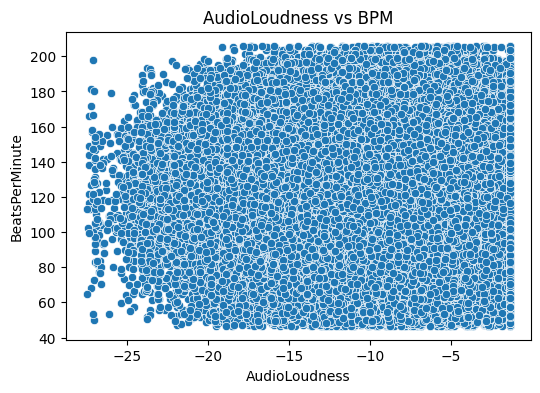

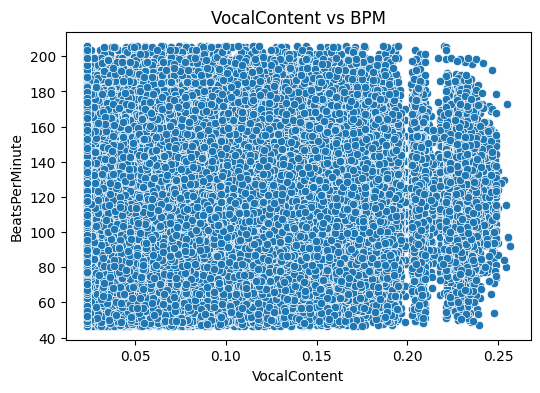

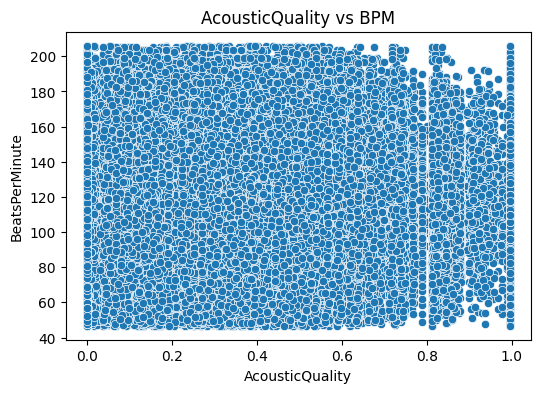

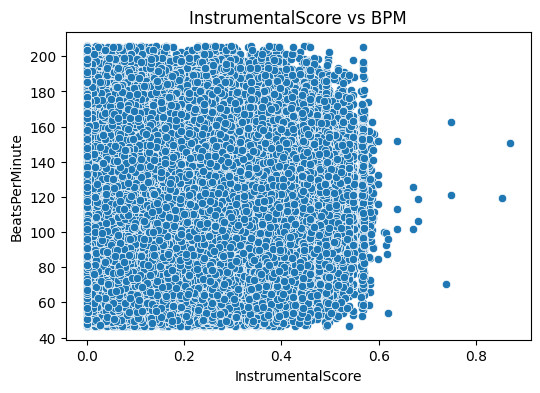

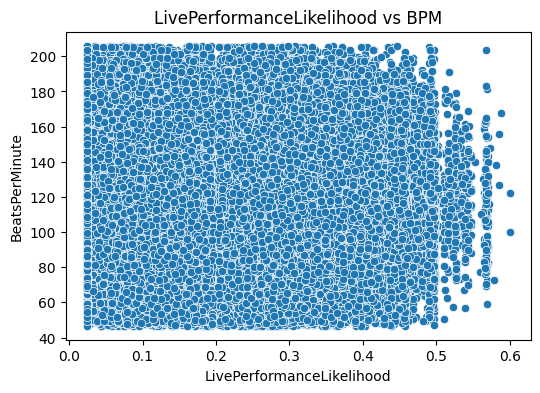

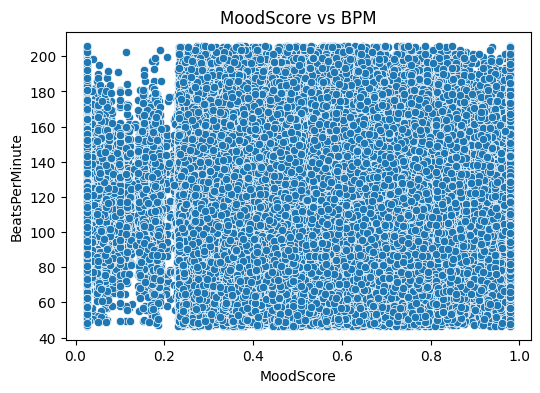

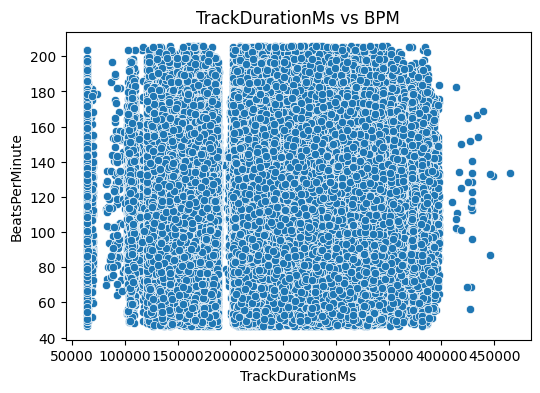

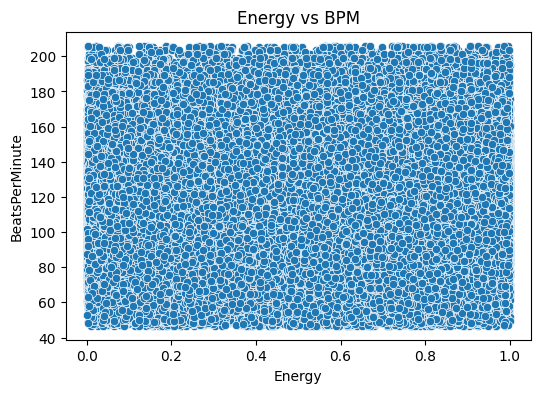

In [ ]:
num_cols = df.drop(columns=['id','BeatsPerMinute']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['BeatsPerMinute'])
    plt.title(f"{col} vs BPM")
    plt.show()

In [ ]:
X_train = df.drop(['id','BeatsPerMinute'],axis=1)
y_train = df['BeatsPerMinute']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float64
 1   AudioLoudness              524164 non-null  float64
 2   VocalContent               524164 non-null  float64
 3   AcousticQuality            524164 non-null  float64
 4   InstrumentalScore          524164 non-null  float64
 5   LivePerformanceLikelihood  524164 non-null  float64
 6   MoodScore                  524164 non-null  float64
 7   TrackDurationMs            524164 non-null  float64
 8   Energy                     524164 non-null  float64
dtypes: float64(9)
memory usage: 36.0 MB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 524164 entries, 0 to 524163
Series name: BeatsPerMinute
Non-Null Count   Dtype  
--------------   -----  
524164 non-null  float64
dtypes: float64(1)
memory usage: 4.0 MB


In [ ]:
X_test = pd.read_csv("/content/playground-series-s5e9/test.csv")

In [ ]:
X_test = X_test.drop(['id'],axis=1)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                174722 non-null  float64
 1   AudioLoudness              174722 non-null  float64
 2   VocalContent               174722 non-null  float64
 3   AcousticQuality            174722 non-null  float64
 4   InstrumentalScore          174722 non-null  float64
 5   LivePerformanceLikelihood  174722 non-null  float64
 6   MoodScore                  174722 non-null  float64
 7   TrackDurationMs            174722 non-null  float64
 8   Energy                     174722 non-null  float64
dtypes: float64(9)
memory usage: 12.0 MB


## Test 1
- Training model directly without applying EDA

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_1 = lr.fit(X_train,y_train)
y_predict_1 = model_1.predict(X_test)

In [ ]:
test_df = pd.read_csv("/content/playground-series-s5e9/test.csv")
submission_df = pd.DataFrame({'id': test_df['id'], 'BeatsPerMinute': y_predict_1})
submission_df.to_csv('submission.csv', index=False)

- use polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


lr_poly = LinearRegression()
model_2 = lr_poly.fit(X_train_poly, y_train)
y_predict_2 = model_2.predict(X_test_poly)

In [ ]:
test_df = pd.read_csv("/content/playground-series-s5e9/test.csv")
submission_df = pd.DataFrame({'id': test_df['id'], 'BeatsPerMinute': y_predict_2})
submission_df.to_csv('submission_poly.csv', index=False)

# EDA

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float64
 1   AudioLoudness              524164 non-null  float64
 2   VocalContent               524164 non-null  float64
 3   AcousticQuality            524164 non-null  float64
 4   InstrumentalScore          524164 non-null  float64
 5   LivePerformanceLikelihood  524164 non-null  float64
 6   MoodScore                  524164 non-null  float64
 7   TrackDurationMs            524164 non-null  float64
 8   Energy                     524164 non-null  float64
dtypes: float64(9)
memory usage: 36.0 MB


In [ ]:
X_train.isnull().sum()

,0
RhythmScore,0
AudioLoudness,0
VocalContent,0
AcousticQuality,0
InstrumentalScore,0
LivePerformanceLikelihood,0
MoodScore,0
TrackDurationMs,0
Energy,0


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 524164 entries, 0 to 524163
Series name: BeatsPerMinute
Non-Null Count   Dtype  
--------------   -----  
524164 non-null  float64
dtypes: float64(1)
memory usage: 4.0 MB


In [ ]:
X_train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize only the 'TrackDurationMs' column between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape the column to be 2D for scaling
X_train_audio = X_train['AudioLoudness'].values.reshape(-1, 1)
X_test_audio = X_test['AudioLoudness'].values.reshape(-1, 1)
X_train_track_duration = X_train['TrackDurationMs'].values.reshape(-1, 1)
X_test_track_duration = X_test['TrackDurationMs'].values.reshape(-1, 1)

# Apply scaling
X_train['TrackDurationMs'] = scaler.fit_transform(X_train_track_duration)
X_test['TrackDurationMs'] = scaler.transform(X_test_track_duration)

X_train['AudioLoudness'] = scaler.fit_transform(X_train_audio)
X_test['AudioLoudness'] =  scaler.fit_transform(X_test_audio)

In [ ]:
X_train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.603610,0.519749,0.023500,0.000005,0.000001,0.051385,0.409866,0.131591,0.826267
1,0.639451,-0.140271,0.071520,0.444929,0.349414,0.170522,0.651010,-0.498209,0.145400
2,0.514538,-0.116257,0.110715,0.173699,0.453814,0.029576,0.423865,-0.448422,0.624667
3,0.734463,1.000000,0.052965,0.001651,0.159717,0.086366,0.278745,-0.193540,0.487467
4,0.532968,0.105299,0.023500,0.068687,0.000001,0.331345,0.477769,-0.251466,0.947333


In [ ]:
X_test.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.410013,-0.183633,0.023500,0.232910,0.012689,0.271585,0.664321,0.192406,0.424867
1,0.463071,1.000000,0.141818,0.057725,0.257942,0.097624,0.829552,-0.211366,0.846000
2,0.686569,0.845745,0.167851,0.287823,0.210915,0.325909,0.304978,0.466005,0.134067
3,0.885793,0.674838,0.118488,0.000005,0.376906,0.134435,0.487740,0.037142,0.316467
4,0.637391,0.562124,0.126099,0.539073,0.068950,0.024300,0.591248,0.066777,0.481067


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


lr_poly = LinearRegression()
model_3 = lr_poly.fit(X_train_poly, y_train)
y_predict_3 = model_2.predict(X_test_poly)

In [ ]:
test_df = pd.read_csv("/content/playground-series-s5e9/test.csv")
submission_df = pd.DataFrame({'id': test_df['id'], 'BeatsPerMinute': y_predict_3})
submission_df.to_csv('submission_poly_1.csv', index=False)

# Test 2
